<a href="https://colab.research.google.com/github/Mikhail-Klochkov/ml_intro/blob/master/Klochkov_ensembles_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OKFSv2GpuUFDphO0r8LdM7bl6MAWwBfX' -O data.csv

--2021-04-11 17:13:08--  https://docs.google.com/uc?export=download&id=1OKFSv2GpuUFDphO0r8LdM7bl6MAWwBfX
Resolving docs.google.com (docs.google.com)... 216.58.192.110, 2607:f8b0:4026:803::200e
Connecting to docs.google.com (docs.google.com)|216.58.192.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jq9icil9cbphlukns3rfl6crtd9689ne/1618161150000/03856158561714992485/*/1OKFSv2GpuUFDphO0r8LdM7bl6MAWwBfX?e=download [following]
--2021-04-11 17:13:09--  https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jq9icil9cbphlukns3rfl6crtd9689ne/1618161150000/03856158561714992485/*/1OKFSv2GpuUFDphO0r8LdM7bl6MAWwBfX?e=download
Resolving doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.googleusercontent.com)... 216.58.192.97, 2607:f8b0:4026:803::2001
Connecting to doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.google

В этой домашней работе вы будете предсказывать стоимость домов по их характеристикам.

Метрика качества: `RMSE`

Оценивание:
* Baseline - 2 балла
* Feature Engineering - 2 балла
* Model Selection - 3 балла
* Ensemble v.1 - 3 балла
* (*) Ensemble v.2 - дополнительно, 2 балла

### Описание датасета

Короткое описание данных:
```
price: sale price (this is the target variable)
id: transaction id
timestamp: date of transaction
full_sq: total area in square meters, including loggias, balconies and other non-residential areas
life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
floor: for apartments, floor of the building
max_floor: number of floors in the building
material: wall material
build_year: year built
num_room: number of living rooms
kitch_sq: kitchen area
state: apartment condition
product_type: owner-occupier purchase or investment
sub_area: name of the district

The dataset also includes a collection of features about each property's surrounding neighbourhood, and some features that are constant across each sub area (known as a Raion). Most of the feature names are self explanatory, with the following notes. See below for a complete list.

full_all: subarea population
male_f, female_f: subarea population by gender
young_*: population younger than working age
work_*: working-age population
ekder_*: retirement-age population
n_m_{all|male|female}: population between n and m years old
build_count_*: buildings in the subarea by construction type or year
x_count_500: the number of x within 500m of the property
x_part_500: the share of x within 500m of the property
_sqm_: square meters
cafe_count_d_price_p: number of cafes within d meters of the property that have an average bill under p RUB
trc_: shopping malls
prom_: industrial zones
green_: green zones
metro_: subway
_avto_: distances by car
mkad_: Moscow Circle Auto Road
ttk_: Third Transport Ring
sadovoe_: Garden Ring
bulvar_ring_: Boulevard Ring
kremlin_: City center
zd_vokzaly_: Train station
oil_chemistry_: Dirty industry
ts_: Power plant
```

### Setup

In [2]:
import pandas as pd

In [11]:
df = pd.read_csv("data.csv", parse_dates=["timestamp"], )

Разделите имеющиеся у вас данные на обучающую и тестовую выборки. В качестве обучающей выборки возьмите первые 80% данных, последние 20% - тестовая выборка.

Возможно в ваших моделях вам придется указывать, какие колонки являются категориальными (например, в бустингах). Для упрощения предлагается разделить колонки по следующему принципу:
```
drop_columns = [
    'id',           # May leak information
    'timestamp',    # May leak information
]
cat_columns = [
    'product_type',              #
    'material',                  # Material of the wall
    'state',                     # Satisfaction level
    'sub_area',                  # District name
    'culture_objects_top_25',    #
    'thermal_power_plant_raion', #
    'incineration_raion',        #
    'oil_chemistry_raion',       #
    'radiation_raion',           #
    'railroad_terminal_raion',   #
    'big_market_raion',          #
    'nuclear_reactor_raion',     #
    'detention_facility_raion',  #
    'ID_metro',                  #
    'ID_railroad_station_walk',  #
    'ID_railroad_station_avto',  #
    'water_1line',               #
    'ID_big_road1',              #
    'big_road1_1line',           #
    'ID_big_road2',              #
    'railroad_1line',            #
    'ID_railroad_terminal',      #
    'ID_bus_terminal',           #
    'ecology',                   #
]
num_columns = list(set(df.columns).difference(set(cat_columns + drop_columns)))
```

In [12]:
drop_columns = [
    'id',           # May leak information
]
cat_columns = [
    'product_type',              #
    'material',                  # Material of the wall
    'state',                     # Satisfaction level
    'sub_area',                  # District name
    'culture_objects_top_25',    #
    'thermal_power_plant_raion', #
    'incineration_raion',        #
    'oil_chemistry_raion',       #
    'radiation_raion',           #
    'railroad_terminal_raion',   #
    'big_market_raion',          #
    'nuclear_reactor_raion',     #
    'detention_facility_raion',  #
    'ID_metro',                  #
    'ID_railroad_station_walk',  #
    'ID_railroad_station_avto',  #
    'water_1line',               #
    'ID_big_road1',              #
    'big_road1_1line',           #
    'ID_big_road2',              #
    'railroad_1line',            #
    'ID_railroad_terminal',      #
    'ID_bus_terminal',           #
    'ecology',                   #
]
num_columns = list(set(df.columns).difference(set(cat_columns + drop_columns)))

In [13]:
# -- we have categorical features and nums features -- #
# -- Как оказывается в num_columns находяться не все численные признаки -- #

print('Признаки не попавшие в num_columns: ')
set(df.select_dtypes(np.number).columns.tolist()).difference(num_columns)

Признаки не попавшие в num_columns: 


{'ID_big_road1',
 'ID_big_road2',
 'ID_bus_terminal',
 'ID_metro',
 'ID_railroad_station_avto',
 'ID_railroad_station_walk',
 'ID_railroad_terminal',
 'id',
 'material',
 'state'}

In [14]:
df = df.drop(columns = drop_columns)

In [15]:
print('X_train shape: {}'.format(X_train.shape[0]))
print('X_test shape: {}'.format(X_test.shape[0]))


X_train shape: 16000
X_test shape: 4000


### Baseline (2 балла)

В качестве Baseline обучите `DecisionTreeRegressor` из `sklearn`.

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

Разделим на Train, test. Немного сделаем по своему, чтобы держать вместе весь датасет, просто перемешаем случайно наши данные и выбрем индекс по которому мы разобъём наш датасет.

In [17]:
seed = 42

In [18]:
# -- we have very very big numbers Nan values in our dataset ~ 50 % от всех данных -- #
# -- Обработка пропущенных значений -- #
# -- Стратегия: выкинуть все те колонки, что имеют процентное число пропущенных значений больше 15 процентов -- #
# -- Остальные missing values заполнить либо mode(категориальные), либо median (numeric) -- #

df_shuffle = df.copy(deep = True)
np.random.seed(seed)
indexes = np.arange(df.shape[0])
np.random.shuffle(indexes)
df_shuffle = df.iloc[indexes, :]

split_index = int(df_shuffle.shape[0]*0.8)
print('split index: {}'.format(split_index))

split index: 16000


In [22]:
from sklearn.impute import KNNImputer
# -- Тут мы можем заполнять пропуски как обычным способом median, mode, а также как и Knn_imputer -- #
# -- Также мы удаляем некоторые признаки, что имеют слишком много пропусков, обычно стоит обрабатывать пропуски, когда
# -- Данных пропущенных не более 20-15 процентов, относительно всех данных в датасете -- #
def impute_missed_values(df, 
                         percent = 15.,
                         split_index = split_index,
                         col_state: list = [],
                         knn_impute = False,
                         knn_type = 'uniform',
                   ):
  """
  take df, percent  - процентное соотношение пропущенных значений, которые мы выкидываем
  col_state - колонки, которые мы хотим оставить!
  производим примитивное заполнение данных в соответствии с модой и median для численных значений
  split_index - it's индекс разделяющий [train, test] в df
  """
  missing_values = df.isna().sum(axis = 0).sort_values(ascending = False)*100/df.shape[0]
  drop_columns_big_miss = missing_values[(missing_values >= percent)].index.tolist()
  missing_values  = missing_values[(missing_values < percent) & (missing_values > 0.)]  

  df_ = df.copy(deep = True)
  # -- drop columns которых нет в col_state(принудительно оставляем) -- #
  for idx, col in enumerate(drop_columns_big_miss, 0):
    if col not in set(col_state):
      df_ = df_.drop(columns = [col])
  
  # -- impute missed values -- #
  # -- Объеденить те колонки, что уже выбраны и те, что мы принудительно хотим видеть -- #
  missing_values = missing_values.index.tolist() + col_state
  assert(isinstance(missing_values, list))
  for idx, col in enumerate(missing_values, 0):
  # -- it's numerical data -- #
    train_col = df_[col].iloc[:split_index]
    # -- по обучающей выборке именно -- #
    if(not knn_impute):
      if((df_[col].dtype.__str__().find('float') != -1) or (df_[col].dtype.__str__().find('int') != -1)):
        # -- use median -- #
        df_[col].fillna(train_col.median(), inplace = True)
      elif(df_[col].dtype.__str__().find('object') != -1):
        # -- use mode[0] -- #
        df_[col].fillna(train_col.mode()[0], inplace = True)
      if(df_[col].isna().sum() != 0):
        print('col : {} have : {} Nan object'.format(col, df_[col].isna().sum()))
    else:
      knn_imputer = KNNImputer(n_neighbors = 10, 
                               weights = knn_type)
      # -- we should use train -- #
      knn_imputer.fit(train_col.values[:, None])
      df_[col] = knn_imputer.transform(df_[col].values[:, None])
      print('col: {} type_columns : {}, num_miss_values: {}'.format(col, 
                                  df_[col].dtype, 
                                  df_[col].isna().sum(),
                            ))
  # -- check Nan obj -- #
  assert(df_.isna().sum(axis = 0).sum() == 0)
  return df_

In [24]:
# -- Эти данные мы заполнили обычными медианами для численных признаков, и mode для категориальных -- #
df_new = impute_missed_values(df_shuffle, percent = 20., 
                                   split_index = split_index,
                                   col_state = ['kitch_sq', 
                                                'full_sq',
                                                'max_floor'],
                                  knn_impute = False,
                                  )

for idx, col in enumerate(df_new.select_dtypes('object').columns, 0):
  df_new[col], what = pd.factorize(df_new[col])
  print('col : {} size of unique: {}'.format(col, what.shape[0]))

col : product_type size of unique: 2
col : sub_area size of unique: 146
col : culture_objects_top_25 size of unique: 2
col : thermal_power_plant_raion size of unique: 2
col : incineration_raion size of unique: 2
col : oil_chemistry_raion size of unique: 2
col : radiation_raion size of unique: 2
col : railroad_terminal_raion size of unique: 2
col : big_market_raion size of unique: 2
col : nuclear_reactor_raion size of unique: 2
col : detention_facility_raion size of unique: 2
col : water_1line size of unique: 2
col : big_road1_1line size of unique: 2
col : railroad_1line size of unique: 2
col : ecology size of unique: 5


In [29]:
# -- Разделим и выделим X_train, X_test, y_train, y_test -- #
target = 'price'
df_train = df_new.iloc[:split_index, :]
df_test = df_new.iloc[split_index:, :]

X_train = df_train.drop(columns = [target])
X_test = df_test.drop(columns = [target])

y_train = df_train[target]
y_test = df_test[target]

In [30]:
# -- Запустим Baseline -- #
# -- Обычным деревом должно быть переобучение -- #
tree_regr = DecisionTreeRegressor(max_depth = 3)
X_train = X_train.drop(columns = ['timestamp'])
X_test = X_test.drop(columns = ['timestamp'])

tree_regr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Проверьте качество на отложенной выборке.

In [31]:
from sklearn.metrics import mean_squared_error
y_pred = tree_regr.predict(X_test)
y_pred_train = tree_regr.predict(X_train)

print('[Test] Baseline mse: {:.2f}\nroot_mse: {:.2f}'.format(mean_squared_error(y_pred, y_test),
                                                       np.sqrt(mean_squared_error(y_pred, y_test))))

print('[Train] Baseline mse: {:.2f}\nroot_mse: {:.2f}'.format(mean_squared_error(y_pred_train, y_train),
                                                       np.sqrt(mean_squared_error(y_pred_train, y_train))))

[Test] Baseline mse: 11357284218754.62
root_mse: 3370057.01
[Train] Baseline mse: 10449717436724.32
root_mse: 3232602.27


In [32]:
tree_regr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Попробуем в качестве baseline также перебрать всевозможные значения основных параметров алгоритма Decision Tree Regressor

In [33]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [34]:
from sklearn.model_selection import RandomizedSearchCV, KFold

param_grid = {
    'max_depth' : np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(2, 100, 5),
}

kf = KFold(5, shuffle = True)
rs = RandomizedSearchCV(DecisionTreeRegressor(), 
                        param_distributions = param_grid,
                        cv = kf, scoring = 'neg_mean_squared_error')

rs.fit(X_train, y_train)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                          

In [35]:
print('Best Estimator: ')
print(rs.best_estimator_)
print('Best params: ')
print(rs.best_params_)

print('Best mse: ')
print(-rs.best_score_)

print('Best rootmse: ')
print(np.sqrt(-rs.best_score_))


Best Estimator: 
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=52, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Best params: 
{'min_samples_leaf': 52, 'max_depth': 8}
Best mse: 
8971432842165.441
Best rootmse: 
2995235.022859716


In [36]:
print('root MSE after fit hyperparameters for tree on test: {}'.format(np.sqrt(mean_squared_error(rs.best_estimator_.predict(X_test), 
                                                                    y_test))))

root MSE after fit hyperparameters for tree on test: 3046376.923874123


### Feature Engineering (2 балла)

Часто улучшить модель можно с помощью аккуратного Feature Engineering.

Добавим в модель дополнительные признаки:
* "Как часто в этот год и этот месяц появлились объявления"
* "Как часто в этот год и эту неделю появлялись объявления"

Добавьте следюущие дополнительные признаки:
* Месяц (из колонки `timestamp`)
* День недели (из колонки `timestamp`)
* Отношение "этаж / максимальный этаж в здании" (колонки `floor` и `max_floor`)
* Отношение "площадь кухни / площадь квартиры" (колонки `kitchen_sq` и `full_sq`)

По желанию можно добавить и другие признаки.

In [53]:
# -- Важно сюда уже перемешанный датасет передать -- #
df_new_wide = impute_missed_values(df_shuffle, percent = 20., 
                                   split_index = split_index,
                                   col_state = ['kitch_sq', 
                                                'full_sq',
                                                'max_floor'])

In [54]:
# -- label_encoding for categorical features -- #
for idx, col in enumerate(df_new_wide.select_dtypes('object').columns, 0):
  df_new_wide[col], what = pd.factorize(df_new_wide[col])
  print('col : {} size of unique: {}'.format(col, what.shape[0]))

col : product_type size of unique: 2
col : sub_area size of unique: 146
col : culture_objects_top_25 size of unique: 2
col : thermal_power_plant_raion size of unique: 2
col : incineration_raion size of unique: 2
col : oil_chemistry_raion size of unique: 2
col : radiation_raion size of unique: 2
col : railroad_terminal_raion size of unique: 2
col : big_market_raion size of unique: 2
col : nuclear_reactor_raion size of unique: 2
col : detention_facility_raion size of unique: 2
col : water_1line size of unique: 2
col : big_road1_1line size of unique: 2
col : railroad_1line size of unique: 2
col : ecology size of unique: 5


In [55]:
month_year = (df_new_wide.timestamp.dt.month + df_new_wide.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df_new_wide["month_year_cnt"] = month_year.map(month_year_cnt_map)

week_year = (df_new_wide.timestamp.dt.weekofyear + df_new_wide.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df_new_wide["week_year_cnt"] = week_year.map(week_year_cnt_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [56]:
eps = 1
df_new_wide['month'] = df_new_wide.timestamp.dt.month
df_new_wide['day_of_week'] = df_new_wide.timestamp.dt.dayofweek
df_new_wide['floor_maxfloor'] = df_new_wide.floor/(df_new_wide.max_floor + eps)
df_new_wide['kitch_sq_full_sq'] = df_new_wide.kitch_sq/(df_new_wide.full_sq + eps)

In [57]:
df_new_wide = df_new_wide.drop(columns = ['timestamp'])

In [58]:
# -- проверка на наличие пропусков в данных -- #
df_new_wide.isna().sum(axis = 0).sort_values(ascending = False).sum() == 0

True

Тут поиграемся с данными, которые мы заполним по KnnImputer.

In [43]:
df_new_wide_knn = impute_missed_values(df_shuffle, percent = 20., 
                                   split_index = split_index,
                                   col_state = ['kitch_sq', 
                                                'full_sq',
                                                'max_floor'],
                                  knn_impute = True,
                                  knn_type = 'uniform',
                                  )

col: build_count_frame type_columns : float64, num_miss_values: 0
col: build_count_after_1995 type_columns : float64, num_miss_values: 0
col: build_count_wood type_columns : float64, num_miss_values: 0
col: build_count_block type_columns : float64, num_miss_values: 0
col: raion_build_count_with_material_info type_columns : float64, num_miss_values: 0
col: build_count_panel type_columns : float64, num_miss_values: 0
col: build_count_monolith type_columns : float64, num_miss_values: 0
col: build_count_brick type_columns : float64, num_miss_values: 0
col: build_count_before_1920 type_columns : float64, num_miss_values: 0
col: build_count_mix type_columns : float64, num_miss_values: 0
col: build_count_1921-1945 type_columns : float64, num_miss_values: 0
col: build_count_foam type_columns : float64, num_miss_values: 0
col: build_count_1946-1970 type_columns : float64, num_miss_values: 0
col: raion_build_count_with_builddate_info type_columns : float64, num_miss_values: 0
col: build_count_sl

In [44]:
for idx, col in enumerate(df_new_wide_knn.select_dtypes('object').columns, 0):
  df_new_wide_knn[col], what = pd.factorize(df_new_wide_knn[col])
  print('col : {} size of unique: {}'.format(col, what.shape[0]))

col : product_type size of unique: 2
col : sub_area size of unique: 146
col : culture_objects_top_25 size of unique: 2
col : thermal_power_plant_raion size of unique: 2
col : incineration_raion size of unique: 2
col : oil_chemistry_raion size of unique: 2
col : radiation_raion size of unique: 2
col : railroad_terminal_raion size of unique: 2
col : big_market_raion size of unique: 2
col : nuclear_reactor_raion size of unique: 2
col : detention_facility_raion size of unique: 2
col : water_1line size of unique: 2
col : big_road1_1line size of unique: 2
col : railroad_1line size of unique: 2
col : ecology size of unique: 5


Тоже самое, только для данных заполненные с помощью KNNImputer

In [46]:
month_year = (df_new_wide_knn.timestamp.dt.month + df_new_wide_knn.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df_new_wide_knn["month_year_cnt"] = month_year.map(month_year_cnt_map)

week_year = (df_new_wide_knn.timestamp.dt.weekofyear + df_new_wide_knn.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df_new_wide_knn["week_year_cnt"] = week_year.map(week_year_cnt_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [47]:
eps = 1
df_new_wide_knn['month'] = df_new_wide_knn.timestamp.dt.month
df_new_wide_knn['day_of_week'] = df_new_wide_knn.timestamp.dt.dayofweek
df_new_wide_knn['floor_maxfloor'] = df_new_wide_knn.floor/(df_new_wide_knn.max_floor + eps)
df_new_wide_knn['kitch_sq_full_sq'] = df_new_wide_knn.kitch_sq/(df_new_wide_knn.full_sq + eps)

In [49]:
df_new_wide_knn = df_new_wide_knn.drop(columns = ['timestamp'])

In [50]:
# -- проверка на наличие пропусков в данных -- #
df_new_wide_knn.isna().sum(axis = 0).sort_values(ascending = False).sum() == 0

True

Разделите выборку на обучающую и тестовую еще раз (потому что дополнительные признаки созданы для исходной выборки).

In [59]:
# -- разделить выборку ещё раз по split_index -- #
def split_dataset(df, 
                  split_index: int = split_index, 
                  target : str = None):
  """
  Разделяет датасет по индексу и возвращает X_train, X_test, y_train, y_test
  """
  df_train = df.iloc[:split_index, :]
  df_test = df.iloc[split_index:, :]

  X_train = df_train.drop(columns = [target])
  X_test = df_test.drop(columns = [target])

  y_train = df_train[target]
  y_test = df_test[target]

  return [X_train, X_test, y_train, y_test]


X_train, X_test, y_train, y_test = split_dataset(df_new_wide, 
                                                 split_index, 
                                                 target = 'price')

### Model Selection (3 балла)

Посмотрите, какого качества можно добиться если использовать разные модели:
* `DecisionTreeRegressor` из `sklearn`
* `RandomForestRegressor` из `sklearn`
* `CatBoostRegressor`

Также вы можете попробовать линейные модели, другие бустинги (`LigthGBM` и `XGBoost`).

Почти все библиотеки поддерживают удобный способ подбора гиперпараметров: посмотрите как это делать в [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) или в [catboost](https://catboost.ai/docs/concepts/python-reference_catboostregressor_grid_search.html).

Проверяйте качество каждой модели на тестовой выборке и выберите наилучшую.

In [60]:

# -- Все модели по подбираем по cv -- #

param_grid = {
    'max_depth' : np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(2, 100, 5),
}

kf = KFold(5, shuffle = True)
rs_tree = RandomizedSearchCV(DecisionTreeRegressor(), 
                        param_distributions = param_grid,
                        cv = kf, scoring = 'neg_mean_squared_error')

rs_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                          

In [35]:
print('Best Estimator: ')
print(rs_tree.best_estimator_)
print('Best params: ')
print(rs_tree.best_params_)

print('Best mse: ')
print(-rs_tree.best_score_)

print('Best rootmse: ')
print(np.sqrt(-rs_tree.best_score_))


Best Estimator: 
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=77, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Best params: 
{'min_samples_leaf': 77, 'max_depth': 8}
Best mse: 
9099453779304.14
Best rootmse: 
3016530.089242297


In [61]:
print('root MSE after fit hyperparameters for tree on test: {}'.format(np.sqrt(mean_squared_error(rs_tree.best_estimator_.predict(X_test), 
                                                                    y_test))))

root MSE after fit hyperparameters for tree on test: 3030596.9621467963


In [62]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators' : np.arange(50, 301, 50),
    'max_depth' : np.arange(2, 7, 2),
    'min_samples_leaf': np.arange(2, 100, 20),
    'max_features' : ['auto', 'sqrt', 'log2'],
}
num_samples = 7
kf = KFold(5, shuffle = True)
rs_tree = RandomizedSearchCV(RandomForestRegressor(), 
                        param_distributions = param_grid,
                        cv = kf, scoring = 'neg_mean_squared_error',
                        n_iter = num_samples)

rs_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=...
                                

In [39]:
print('Best Estimator: ')
print(rs_tree.best_estimator_)
print('Best params: ')
print(rs_tree.best_params_)

print('Best mse: ')
print(-rs_tree.best_score_)

print('Best rootmse: ')
print(np.sqrt(-rs_tree.best_score_))

Best Estimator: 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=22,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best params: 
{'n_estimators': 150, 'min_samples_leaf': 22, 'max_features': 'auto', 'max_depth': 6}
Best mse: 
8065017796374.308
Best rootmse: 
2839897.497511892


In [40]:
print('root MSE after fit hyperparameters for randomforest on test: {}'.format(np.sqrt(mean_squared_error(rs_tree.best_estimator_.predict(X_test), 
                                                                    y_test))))

root MSE after fit hyperparameters for randomforest on test: 2829061.509356823


In [64]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 67.3MB 56kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Попробуем запустить boosting 

In [65]:
from catboost import Pool, CatBoostRegressor

# initialize pool
train_pool = Pool(
                X_train,
                y_train,
                  )


test_pool = Pool(
                X_test,
                y_test,
                  )


model = CatBoostRegressor(iterations = 1000, 
                          depth = 3, 
                          learning_rate= 0.01, 
                          loss_function='RMSE',
                          verbose = 0)
#train the model
model.fit(train_pool, verbose = 0)
# make the prediction using the resulting model
preds = model.predict(test_pool)
print('root MSE after fit hyperparameters for catboost on test: {}'.format(np.sqrt(mean_squared_error(preds, 
                                                                    y_test))))


root MSE after fit hyperparameters for catboost on test: 2706963.915520937


<bound method CatBoost.eval_metrics of <catboost.core.CatBoostRegressor object at 0x7fbb7ca7d410>>

In [68]:
from sklearn.metrics import make_scorer
def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better = False)

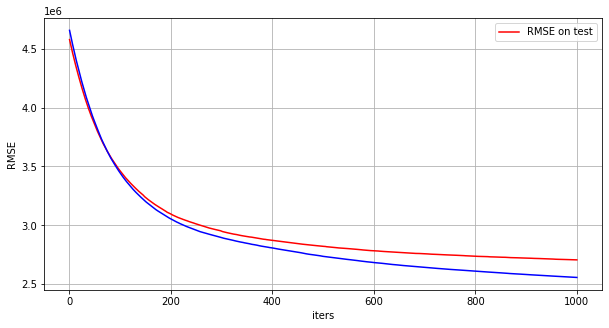

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize = (10, 5))
eval_metrics_train = model.eval_metrics(train_pool, metrics = 'RMSE')
eval_metrics = model.eval_metrics(test_pool, metrics = 'RMSE')
ax.plot(np.arange(1, eval_metrics['RMSE'].__len__()+1, 1), 
        eval_metrics['RMSE'], c = 'r',
        label = 'RMSE on test')

ax.legend()
ax.grid()
ax.set_xlabel('iters')
ax.set_ylabel('RMSE')


ax.plot(np.arange(1, eval_metrics_train['RMSE'].__len__()+1, 1), 
        eval_metrics_train['RMSE'], c = 'b',
        label = 'RMSE on train')

#ax[1].legend()
#ax[1].grid()
#ax[1].set_xlabel('iters')
#ax[1].set_ylabel('RMSE')

plt.show()
# Видно, что в конце мы немного даже переобучаться стали 

Напишем свой randomsearch для бустинга. И обучиим на данных заполненных с помощью KnnImputer


In [70]:
# -- made random search for catboost regressor -- #

def RandomizedSearchCV_my(model, X, y, 
                          cv : int = 3,
                          param_grid: dict = {},
                          random_samples: int = 10,
                          scoring_cv = mean_squared_error,
                          high_is_better = False, # Для accuracy мы хотим, чтобы было больше, а для mse меньше 
                          verbose = 1,
                          ):
  """
  returned the best_model fit and best_params
  """

  # -- X, y -- #
  if(isinstance(X, pd.DataFrame)):
    X = X.values
    y = y.values

  scores_history_tr = {}
  scores_history_ts = {}
  history_params = {}

  for sample in range(random_samples):
    # -- generate point in space parameter -- #
    # -- uniform -- #
    params_sample = {key : np.random.choice(values, size= 1)[0] 
                            for key, values in param_grid.items()}

    history_params[sample] = params_sample                                     
    m = model(**params_sample)
    kf = KFold(n_splits = cv, shuffle = True)
    train_score = []
    test_score = []
    for idx_tr, idx_ts in kf.split(X, y):
      X_tr, X_ts =  X[idx_tr], X[idx_ts]
      y_tr, y_ts = y[idx_tr], y[idx_ts]
      # -- create test pool and train pool -- #
      train_pool = Pool(
          X_tr, y_tr
      )
      test_pool = Pool(
          X_ts, y_ts
      )
      m.fit(train_pool, verbose = 0)
      y_pred_tr = m.predict(train_pool)
      y_pred_ts = m.predict(test_pool)
      train_score.append(scoring_cv(y_tr, y_pred_tr))
      test_score.append(scoring_cv(y_ts, y_pred_ts))
    
    train_score_np = np.asarray(train_score)
    test_score_np = np.asarray(test_score)

    train_info = {'mean_cv' : train_score_np.mean(), 
     'std_cv': train_score_np.std()}

    test_info = {'mean_cv' : test_score_np.mean(), 
     'std_cv': test_score_np.std()}

    if(verbose > 0):
      print('sample: {}, params: {}\ntrain_score: {}\ntest_score: {}'.format(
         sample + 1, params_sample, train_info, test_info, 
      ))


    scores_history_tr[sample] = train_info
    scores_history_ts[sample] = test_info

  # -- find the best score -- #
  # -- we want to minimize score -- # 
  mean_ts = np.asarray([value['mean_cv'] 
                        for key, value in scores_history_ts.items()])
    
  if(high_is_better):
    best_sample = mean_ts.argmax()
  else:
    best_sample = mean_ts.argmin()

  best_score = mean_ts[best_sample]

  if(verbose > 0):
    print('\nFinal:\nbest_validate_score: {}\nbest_params: {}'.format(
        best_score, history_params[best_sample],
    ))

  best_model = model(**history_params[best_sample])
  best_model.fit(X_train, 
                 y_train,
                 verbose = 0)
  return best_model, history_params[best_sample]
    

parameter_space_cat_boost = {
    'iterations':  np.arange(50, 500, 25),
    'depth':  np.arange(2, 7, 2),
    'learning_rate': np.linspace(0.01, 0.5, 5),
    'min_data_in_leaf' :  np.linspace(1, 50, 5),
    'l2_leaf_reg' :  np.linspace(0, 5, 1),
}


X_train, X_test, y_train, y_test = split_dataset(df_new_wide_knn, 
                                                 split_index, 
                                                 target = 'price')

best_cat_regressor, best_params = RandomizedSearchCV_my(CatBoostRegressor, 
                                                        X_train, y_train,
                                                        cv = 3, 
                                                        param_grid = parameter_space_cat_boost, 
                                                        random_samples = 10, 
                                                        scoring_cv = rmse,
                                                        )

sample: 1, params: {'iterations': 100, 'depth': 2, 'learning_rate': 0.1325, 'min_data_in_leaf': 1.0, 'l2_leaf_reg': 0.0}
train_score: {'mean_cv': 2562424.651464606, 'std_cv': 13980.236201037851}
test_score: {'mean_cv': 2814723.302747253, 'std_cv': 54178.08068836941}
sample: 2, params: {'iterations': 350, 'depth': 6, 'learning_rate': 0.3775, 'min_data_in_leaf': 37.75, 'l2_leaf_reg': 0.0}
train_score: {'mean_cv': 730503.788886622, 'std_cv': 7731.803207896644}
test_score: {'mean_cv': 2840189.6375164706, 'std_cv': 53464.3854699346}
sample: 3, params: {'iterations': 225, 'depth': 4, 'learning_rate': 0.3775, 'min_data_in_leaf': 1.0, 'l2_leaf_reg': 0.0}
train_score: {'mean_cv': 1534180.408536533, 'std_cv': 12161.728331815511}
test_score: {'mean_cv': 2779087.319672762, 'std_cv': 93774.9957046115}
sample: 4, params: {'iterations': 200, 'depth': 2, 'learning_rate': 0.1325, 'min_data_in_leaf': 50.0, 'l2_leaf_reg': 0.0}
train_score: {'mean_cv': 2384104.188947417, 'std_cv': 8368.708653001171}
test_

**Ниже, что я получил лучшее на данном запуске. Ранее на других запусках стабильно было около 2.55 млн rmse. Видимо такой запуск.**

In [71]:
y_pred_test = best_cat_regressor.predict(X_test)
print('cat_boost_regressor на test по RandomSearchGridCV: {}'.format(rmse(y_test, y_pred_test)))

cat_boost_regressor на test по RandomSearchGridCV: 2618678.629377176


In [72]:
print('\nbest params catboostregressor: \n')
best_params


best params catboostregressor: 



{'depth': 4,
 'iterations': 300,
 'l2_leaf_reg': 0.0,
 'learning_rate': 0.1325,
 'min_data_in_leaf': 50.0}

*Видно, что если добавить больше иттераций, лучше не станет качество*

In [77]:

train_pool = Pool(
                X_train,
                y_train,
                  )
test_pool = Pool(
                X_test,
                y_test,
                  )

# -- delete iterations -- #
try:

  if(best_params.get('iterations') != -1):
    best_params.pop('iterations')

except KeyError:
  pass

print('best_params: {}'.format(best_params))

best_params['depth'] = 3
model = CatBoostRegressor(iterations = 700,
                          **best_params,
                          verbose = 0)

print(model.get_params())
model.fit(train_pool, verbose = 0)
preds = model.predict(test_pool)
print('root MSE after fit hyperparameters for catboost on test: {}'.format(rmse(preds, 
                                                                    y_test)))

best_params: {'depth': 2, 'learning_rate': 0.1325, 'min_data_in_leaf': 50.0, 'l2_leaf_reg': 0.0}
{'iterations': 700, 'learning_rate': 0.1325, 'depth': 3, 'l2_leaf_reg': 0.0, 'loss_function': 'RMSE', 'verbose': 0, 'min_data_in_leaf': 50.0}
root MSE after fit hyperparameters for catboost on test: 2628584.4340260653


Видно, что добавил глубину с 3 на 4 мы в кривых ошибки на train/test получим уже ощутимый разрыв, это говорит об переобучении, хотя качество на test стало по лучше. Для произвольных параметров было более 2.7 мл, на настроенных (не лучшим образом, так как RandomSearch долгий и не факт, что попадёт правильно) 2.5-2.6 млн. (В фичах особо не копался). У меня не сработал поиск по BayesOpt. 


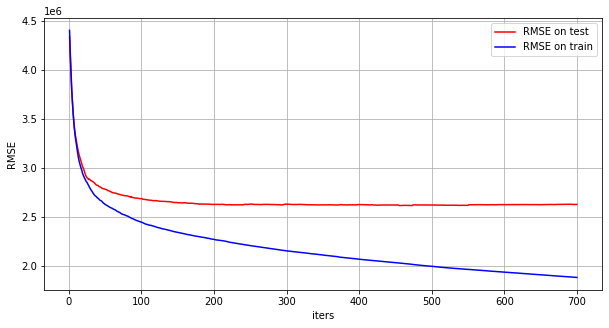

In [78]:

fig, ax = plt.subplots( figsize = (10, 5))
eval_metrics_train = model.eval_metrics(train_pool, metrics = 'RMSE')
eval_metrics = model.eval_metrics(test_pool, metrics = 'RMSE')
ax.plot(np.arange(1, eval_metrics['RMSE'].__len__()+1, 1), 
        eval_metrics['RMSE'], c = 'r',
        label = 'RMSE on test')

ax.plot(np.arange(1, eval_metrics_train['RMSE'].__len__()+1, 1), 
        eval_metrics_train['RMSE'], c = 'b',
        label = 'RMSE on train')


ax.legend()
ax.grid()
ax.set_xlabel('iters')
ax.set_ylabel('RMSE')


plt.show()
# -- Видно, что у нас большое переобучение на подобранных параметрах -- #
# -- Видно, что для test достаточно порядка  ~ 400 итераций, потом происходи просто переобучение на train -- 

На данных заполненных по KnnImputer прибавка в качестве окажеться достаточно мизерной!


In [79]:
X_train, X_test, y_train, y_test = split_dataset(df_new_wide_knn, 
                                                 split_index, 
                                                 target = 'price')

In [86]:

train_pool = Pool(
                X_train,
                y_train,
                  )
test_pool = Pool(
                X_test,
                y_test,
                  )

# -- delete iterations -- #
try:

  if(best_params.get('iterations') != -1):
    best_params.pop('iterations')

except KeyError:
  pass

print('best_params: {}'.format(best_params))

model = CatBoostRegressor(iterations = 700,
                          **best_params,
                          verbose = 0)

print(model.get_params())
model.fit(train_pool, verbose = 0)
preds = model.predict(test_pool)
print('root MSE after fit hyperparameters for catboost on test: {}'.format(rmse(preds, 
                                                                    y_test)))

best_params: {'depth': 3, 'learning_rate': 0.1325, 'min_data_in_leaf': 50.0, 'l2_leaf_reg': 0.0}
{'iterations': 700, 'learning_rate': 0.1325, 'depth': 3, 'l2_leaf_reg': 0.0, 'loss_function': 'RMSE', 'verbose': 0, 'min_data_in_leaf': 50.0}
root MSE after fit hyperparameters for catboost on test: 2628584.4340260653


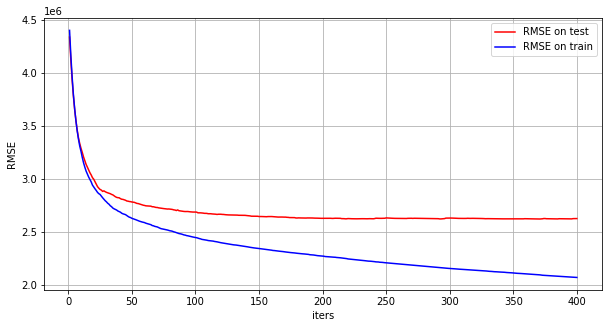

In [81]:
fig, ax = plt.subplots( figsize = (10, 5))
eval_metrics_train = model.eval_metrics(train_pool, metrics = 'RMSE')
eval_metrics = model.eval_metrics(test_pool, metrics = 'RMSE')
ax.plot(np.arange(1, eval_metrics['RMSE'].__len__()+1, 1), 
        eval_metrics['RMSE'], c = 'r',
        label = 'RMSE on test')

ax.plot(np.arange(1, eval_metrics_train['RMSE'].__len__()+1, 1), 
        eval_metrics_train['RMSE'], c = 'b',
        label = 'RMSE on train')


ax.legend()
ax.grid()
ax.set_xlabel('iters')
ax.set_ylabel('RMSE')


plt.show()
# -- Видно, что у нас большое переобучение на подобранных параметрах -- #
# -- Видно, что для test достаточно порядка  ~ 400 итераций, потом происходи просто переобучение на train -- 

### HyperOpt (Не работает) для моделей

In [184]:
# -- Неплохой результат уже по не настроенным параметрам -- #
# -- Необходимо сделать tune -- #
from sklearn.model_selection import cross_val_score, cross_validate


class HyproptObjective(object):

  def __init__(self, X, y, model, 
               conts_params, 
               fit_params,
               cv_splitter, 
               cv_scoring):
    
    self.evaluated_count = 0
    self.X = X
    self.y = y
    self.model = model
    self.constant_params = const_params
    self.fit_params = fit_params
    self.cv_splitter = cv_splitter
    self.cv_scoring = cv_scoring


  def __call__(self, hyper_params):
    # --  for record fit time, validate time and several scorers metrics -- #
    cv_result = cross_validate(
        self.model(**hyper_params, **self.constant_params),
        self.X, 
        self.y,
        scoring = 'neg_mean_squared_error',
        cv = self.cv_splitter,
        fit_params = self.fit_params,
        return_train_score = True,
    )
    self.evaluated_count += 1
    mean_cv_result = np.mean(cv_result['test_score'])
    # -- hyper_opt_always minimize function -- #
    #if(self.cv_scoring._sign > 0):
    #  mean_cv_result = -mean_cv_result

    return -mean_cv_result

def find_best_params(X, 
                     y, 
                     model,
                     const_params, 
                     parameter_space, 
                     fit_params={},
                     max_evals = 25,
                     cv_splitter=None,
                     cv_scoring=None
                    ):
    
    objective = HyproptObjective(X, y, model, const_params, 
                                  fit_params, cv_splitter, cv_scoring)
   
    trials = hyperopt.Trials()
    
    best_params = hyperopt.fmin(
        fn = objective,
        space=parameter_space,
        algo=hyperopt.tpe.suggest,
        rstate=np.random.RandomState(seed=42),
        max_evals=max_evals,
        trials=trials
    ) 
    best_params.update(const_params)
    return best_params, trials



In [158]:
! pip install hyperopt

In [185]:
import hyperopt

const_params = {
    'silent': True,
    'thread_count': -1,
}
parameter_space = {
    'iterations': hyperopt.hp.choice('iterations', np.arange(50, 500, 25)),
    'depth': hyperopt.hp.choice('depth', np.arange(2, 7, 2)),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 0.01, 0.5),
    'min_data_in_leaf' : hyperopt.hp.quniform('min_data_in_leaf', 1, 50, 1),
    'l2_leaf_reg' : hyperopt.hp.uniform('l2_leaf_reg', 0, 5),
}
fit_params = {}

best_params, trials = find_best_params(
    X_train, 
    y_train, 
    CatBoostRegressor,
    const_params,
    parameter_space,
    fit_params,
    max_evals = 3,
    cv_splitter= KFold(n_splits = 3, shuffle = True),
    cv_scoring = rmse_scorer,
)

100%|██████████| 3/3 [00:50<00:00, 16.90s/it, best loss: 7313745258774.6045]


In [186]:
trials.best_trial

{'book_time': datetime.datetime(2021, 4, 10, 1, 54, 50, 849000),
 'exp_key': None,
 'misc': {'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'idxs': {'depth': [1],
   'iterations': [1],
   'l2_leaf_reg': [1],
   'learning_rate': [1],
   'min_data_in_leaf': [1]},
  'tid': 1,
  'vals': {'depth': [2],
   'iterations': [5],
   'l2_leaf_reg': [4.664339994239168],
   'learning_rate': [0.36658561415688923],
   'min_data_in_leaf': [21.0]},
  'workdir': None},
 'owner': None,
 'refresh_time': datetime.datetime(2021, 4, 10, 1, 55, 20, 736000),
 'result': {'loss': 7313745258774.6045, 'status': 'ok'},
 'spec': None,
 'state': 2,
 'tid': 1,
 'version': 0}

In [187]:
print('best params:')
print(best_params)

best_cat_boost = CatBoostRegressor(**best_params)

best_cat_boost.fit(train_pool, verbose = 0)
preds = best_cat_boost.predict(test_pool)
print('root MSE after fit hyperparameters for catboost on test: {}'.format(np.sqrt(mean_squared_error(preds, 
                                                                    y_test))))

best params:
{'depth': 2, 'iterations': 5, 'l2_leaf_reg': 4.664339994239168, 'learning_rate': 0.36658561415688923, 'min_data_in_leaf': 21.0, 'silent': True, 'thread_count': -1}
root MSE after fit hyperparameters for catboost on test: 3364758.0334355445


### Ensemble v.1 (3 балла)

Ансамбли иногда оказываются лучше чем одна большая модель.

В колонке `product_type` содержится информация о том, каким является объявление: `Investment` (продажа квартиры как инвестиции) или `OwnerOccupier` (продажа квартиры для жилья). Логично предположить, что если сделать по модели на каждый из этих типов, то качество будет выше.

Обучите свои лучшие модели на отдельно на `Investment` и `OwnerOccupier` (т.е. у вас будет `model_invest`, обученная на `(invest_train_X, invest_train_Y)` и `model_owner`, обученная на `(owner_train_X, owner_train_Y)`) и проверьте качество на отложенной выборке (т.е. на исходном `test_split`).

In [142]:
X_train, X_test, y_train, y_test = split_dataset(df_new_wide_knn,
                                                         split_index = split_index,
                                                         target = 'price',
                                                         )
# -- Investment - 0, OwnerOccipier - 1 -- #

X_train_inv = X_train[X_train.product_type == 0]
X_train_own = X_train[X_train.product_type == 1]

y_train_inv = y_train[X_train.product_type == 0]
y_train_own = y_train[X_train.product_type == 1]


X_test_inv = X_test[X_test.product_type == 0]
X_test_own = X_test[X_test.product_type == 1]

y_test_inv = y_test[X_test.product_type == 0]
y_test_own = y_test[X_test.product_type == 1]

# -- мы должны убрать эти колонки -- #
X_train_inv.drop(columns = ['product_type'], inplace = True)
X_train_own.drop(columns = ['product_type'], inplace = True)

X_test_inv.drop(columns = ['product_type'], inplace = True)
X_test_own.drop(columns = ['product_type'], inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Лучшей у меня оказалась модель CatBoostRegressor с параметрами подобранными на RandomSearchCV

In [143]:
print('Investment size: {}'.format(X_train_inv.shape[0]))
print('OwnerOccupier size: {}'.format(X_train_own.shape[0]))
print('All train size: {}'.format(X_train.shape[0]))


print('Investment test size: {}'.format(X_test_inv.shape[0]))
print('OwnerOccupier test size: {}'.format(X_test_own.shape[0]))
print('All train size: {}'.format(X_test.shape[0]))

Investment size: 5746
OwnerOccupier size: 10254
All train size: 16000
Investment test size: 1414
OwnerOccupier test size: 2586
All train size: 4000


In [168]:

train_pool_inv = Pool(
                X_train_inv,
                y_train_inv,
                  )
train_pool_own = Pool(
                X_train_own,
                y_train_own,
                  )

test_pool_inv = Pool(
                X_test_inv,
                y_test_inv,
                  )

test_pool_own = Pool(
                X_test_own,
                y_test_own,
                  )


# -- delete iterations (Мы его сами задаем из лучших параметров) -- #
try:

  if(best_params.get('iterations') != -1):
    best_params.pop('iterations')

except KeyError:
  pass

print('best_params:\n')
print(best_params)

model1_inv = CatBoostRegressor(iterations = 450,
                          **best_params,
                          verbose = 0)

model2_own = CatBoostRegressor(iterations = 450,
                          **best_params,
                          verbose = 0)

# -- learn 2 models -- #
model1_inv.fit(train_pool_inv, verbose = 0)
model2_own.fit(train_pool_own, verbose = 0)

preds1_inv = model1_inv.predict(test_pool_inv)
preds2_own = model2_own.predict(test_pool_own)


print('root MSE catboostregressor for investment model test: {}'.format(rmse(preds1_inv, y_test_inv)))
print('root MSE catboostregressor for OwnerOccupier model test: {}'.format(rmse(preds2_own, y_test_own))) 

# -- теперь подсчитаем rmse если учесть сначала ответы на test где investment, а потом OwnerOccupier -- #
      
final_rmse = np.sqrt(mean_squared_error(preds1_inv, y_test_inv) + mean_squared_error(preds2_own, y_test_own))
print('root MSE catboostregressor (where we train on 2 different datasets)  test: {}'.format(final_rmse))


best_params:

{'depth': 3, 'learning_rate': 0.1325, 'min_data_in_leaf': 50.0, 'l2_leaf_reg': 0.0}
root MSE catboostregressor for investment model test: 1579506.9492557934
root MSE catboostregressor for OwnerOccupier model test: 2929440.8536753315
root MSE catboostregressor (where we train on 2 different datasets)  test: 3328132.4970513717


Почему на Owneroccupier  ответы очень даже хорошие, а на Investment плохие? Смотреть графики. Очень странно, хотя вроде внимательно разделил данные...


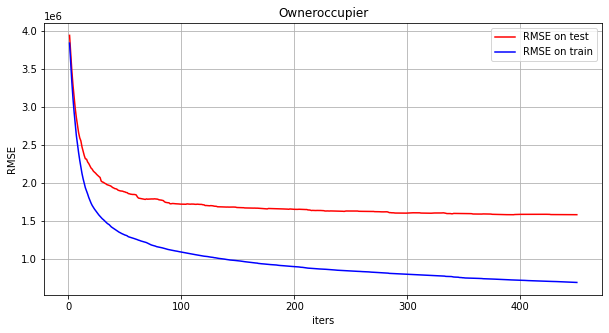

In [169]:
fig, ax = plt.subplots( figsize = (10, 5))
eval_metrics_train = model1_inv.eval_metrics(train_pool_inv, metrics = 'RMSE')
eval_metrics = model1_inv.eval_metrics(test_pool_inv, metrics = 'RMSE')
ax.plot(np.arange(1, eval_metrics['RMSE'].__len__()+1, 1), 
        eval_metrics['RMSE'], c = 'r',
        label = 'RMSE on test')

ax.plot(np.arange(1, eval_metrics_train['RMSE'].__len__()+1, 1), 
        eval_metrics_train['RMSE'], c = 'b',
        label = 'RMSE on train')


ax.legend()
ax.grid()
ax.set_xlabel('iters')
ax.set_ylabel('RMSE')
ax.set_title('Owneroccupier')


plt.show()

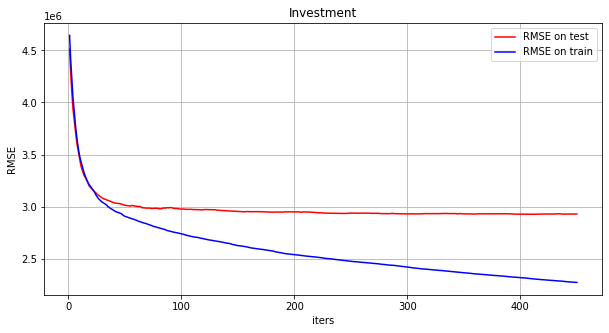

In [170]:
fig, ax = plt.subplots( figsize = (10, 5))
eval_metrics_train = model2_own.eval_metrics(train_pool_own, metrics = 'RMSE')
eval_metrics = model2_own.eval_metrics(test_pool_own, metrics = 'RMSE')
ax.plot(np.arange(1, eval_metrics['RMSE'].__len__()+1, 1), 
        eval_metrics['RMSE'], c = 'r',
        label = 'RMSE on test')

ax.plot(np.arange(1, eval_metrics_train['RMSE'].__len__()+1, 1), 
        eval_metrics_train['RMSE'], c = 'b',
        label = 'RMSE on train')


ax.legend()
ax.grid()
ax.set_xlabel('iters')
ax.set_ylabel('RMSE')
ax.set_title('Investment')


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


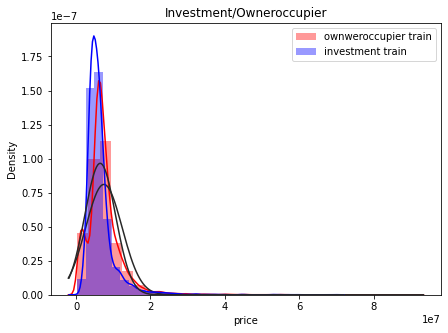

train investment skew: 4.566
train owneroccupier skew: 3.537
test investment skew: 5.622
test owneroccupier skew: 3.733


In [171]:
import scipy
from scipy.stats import norm
fig, ax = plt.subplots(figsize = (7, 5))
sns.distplot(a = y_train_own, bins = 30, hist = True,
             fit = norm,
             ax = ax,
             label = 'ownweroccupier train',
             color = 'red',
             )

sns.distplot(a = y_train_inv, bins = 30, hist = True,
             fit = norm,
             ax = ax,
             label = 'investment train',
             color = 'b'
             )

ax.set_title('Investment/Owneroccupier')
ax.legend()
plt.show()

print('train investment skew: {:.3f}'.format(scipy.stats.skew(y_train_inv)))
print('train owneroccupier skew: {:.3f}'.format(scipy.stats.skew(y_train_own)))


print('test investment skew: {:.3f}'.format(scipy.stats.skew(y_test_inv)))
print('test owneroccupier skew: {:.3f}'.format(scipy.stats.skew(y_test_own)))



### (*) Ensemble v.2 (дополнительно, 2 балла)

Попробуйте сделать для `Investment` более сложную модель: обучите `CatBoostRegressor` и `HuberRegressor` из `sklearn`, а затем сложите их предсказания с весами `w_1` и `w_2` (выберите веса сами; сумма весов равняется 1).

А теперь давайте на crorss-val подберём коэффициенты для модели. $\alpha_{1, 2}$

In [150]:
# -- Мы можем обучить на ответах этих двух алгоримов, они будут конечно - же сильно скоррелированные -- #
def weighted_model(model_list: list,  
                   X, y,
                   cv = 3,
                   grids = 5,
                   cv_scoring = mean_squared_error,
                   high_score_is_better = False, 
                   verbose = 1, 
                   brute_algo = True, 
                   ):
  
  """
  brute_algo - перебирает веса по сетке - это очень долго, с учётом кросс-валидации (True, False)
  returned best_weights, and best_score_cv
  """
  if(isinstance(X, pd.DataFrame)):
    X = X.values
    
  if(isinstance(y, pd.DataFrame) or isinstance(y, pd.Series)):
    y = y.values
    
  kf = KFold(n_splits = cv, shuffle = True)
  scores = {}

  if(model_list.__len__() == 2):
    # -- Мы можем перебрать по сетке -- #
    model1, model2 = model_list
    alphas = np.linspace(0.1, 0.95, grids)
    for idx, alpha in enumerate(alphas, 0):
      scores_arr = []
      for idx_tr, idx_ts in kf.split(X, y):
        X_tr, X_val = X[idx_tr], X[idx_ts]
        y_tr, y_val = y[idx_tr], y[idx_ts]
        # -- learned basic models -- #
        # -- for catboost we should create pools -- #
        if(model1.__str__().find('catboost') != -1):
          tr_pool = Pool(X_tr, y_tr)
          val_pool = Pool(X_val, y_val)

          model1.fit(tr_pool, verbose = 0)
          # -- predict -- #
          preds1 = model1.predict(val_pool)

        else: # -- предполагаем, что тут sklearn -- #
          model1.fit(X_tr, y_tr)
          model2.fit(X_tr, y_tr)

          # -- predict -- #
          preds1 = model1.predict(X_val)
          preds2 = model2.predict(X_val)

        if(model2.__str__().find('catboost') != -1):
          tr_pool = Pool(X_tr, y_tr)
          val_pool = Pool(X_val, y_val)
          model2.fit(tr_pool, verbose = 0)
          # -- predict -- #
          preds2 = model2.predict(val_pool)

        else: # -- предполагаем, что тут sklearn -- #
          model2.fit(X_tr, y_tr)
          # -- predict -- #
          preds2 = model2.predict(X_val)

        # -- create weighted answer -- #
        preds_weighted = alpha * preds1 + (1 - alpha) * preds2
        score = np.sqrt(cv_scoring(y_val, preds_weighted)) # (y_test, preds)
        scores_arr.append(score)

      scores[alpha] = np.asarray(scores_arr).mean()
      # -- print info -- #
      if(verbose > 0):
        print('alpha: {:.3f}\nscore on validation: {:.2f}'.format(
            alpha, scores[alpha], 
        ))

    scores_np = np.asarray(scores.values())
    if(high_score_is_better):
      # -- for example accuracy should high -- #
      alphas_best = alphas[scores_np.argmax()]
      score_best = scores_np.max()
    else:
      # -- rmse should be smaller -- # 
      alphas_best = alphas[scores_np.argmin()]
      score_best = scores_np.min()

  else:
    # -- Если моделей больше 1-ой -- #
    pass

  return alphas_best, score_best

In [183]:
import warnings
warnings.filterwarnings("ignore")

In [184]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline

# -- Более удобен в случае наличие больших хвостов в данных т.е к выбросам -- #
# -- important data (epsilon, alpha) -- #

model = Pipeline([
          ('std', StandardScaler()),
          ('huber', HuberRegressor())
])
param_grid = {
    'huber__epsilon':  [1.35, 1.5, 1.75, 1.9],
    'huber__alpha': np.logspace(-4, 2, 5),
}

kf = KFold(3, shuffle=True)
grid_search = GridSearchCV(model, 
                           cv = kf,
                           param_grid = param_grid,
                           scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_own, y_train_own)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('huber',
                                        HuberRegressor(alpha=0.0001,
                                                       epsilon=1.35,
                                                       fit_intercept=True,
                                                       max_iter=100, tol=1e-05,
                                                       warm_start=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'huber__alpha': array([1.00000000e-04, 3.16227766e-03, 1.00000000e

In [187]:
# -- подсчитаем качество по настроенным весам -- #
print('score on huber after grid search: {:.0f}'.format(np.sqrt(-grid_search.best_score_)))


score on huber after grid search: 3502883


In [188]:
best_weight, best_score_cv = weighted_model([grid_search.best_estimator_, model2_own],
               X_train_own, y_train_own, grids = 5,
               cv_scoring = mean_squared_error, 
               high_score_is_better = False)

alpha: 0.100
score on validation: 3178836.37
alpha: 0.312
score on validation: 3135336.28
alpha: 0.525
score on validation: 3232773.85
alpha: 0.737
score on validation: 3292388.72
alpha: 0.950
score on validation: 3522914.35


Ответ на тесте для investment на скомбинированном алгоритме не вырос. Потому-что huber даёт качество, ниже чем обычное дерево глубины 3...


In [198]:
print('{}*huber + {}*catboostregressor'.format(best_weight, 1-best_weight))
preds = best_alpha * grid_search.best_estimator_.predict(X_test_own) + (1 - best_alpha) * model2_own.predict(test_pool_own)
print('rmse on investment data: {}'.format(rmse(preds, y_test_own)))

0.1*huber + 0.9*catboostregressor
rmse on investment data: 2981421.9505396103
